In [1]:
import matplotlib.pyplot as plt
import numpy as np

The Kernel

The kernel function determines the correlation between two arrays of variables and returns the correlation matrix. The RBF kernel is the most commonly used because of its useful properties. Similar values result in higher correlation. In our regression problem, this means that two points close to each other in the x-dimension will also have a high correlation in the y-dimension.

In [2]:
def kernel(X,X_, l , sigma):
    sqdist = (X - X_.T) ** 2
    return  sigma**2 * np.exp( -(sqdist) / (2*l**2))

In [3]:
X_1 = np.array([1,3,4]).reshape(-1,1)
X_2 = np.array([5,6,4]).reshape(-1,1)

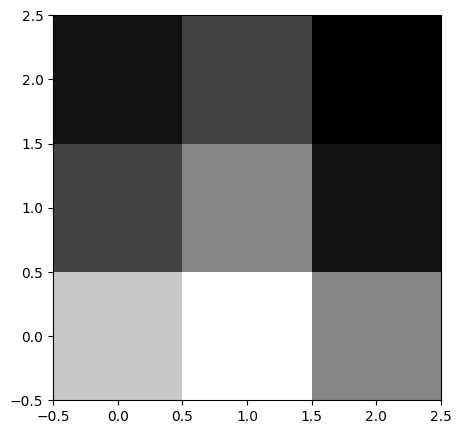

In [4]:
plt.figure( figsize=(5,5))
plt.pcolormesh([0,1,2],[0,1,2],kernel(X_1,X_2,3,4), cmap="binary")

In [5]:
print(kernel(X_1,X_2,5,4))

[[11.61838459  9.70449056 13.36432338]
 [14.76986154 13.36432338 15.68317877]
 [15.68317877 14.76986154 16.        ]]


Both in the colormesh and numerically, it is visible that when i,j=2, the correlation matrix has the highest value of 16. This makes sense because X_1[2] = X_2[2]; since the points are at the same position, they have the highest correlation. Conversely, X_1[0]=1 and X_2[1]=6 have the lowest correlation because they have the greatest distance.

Intuitively, for our model, this means that knowing the value at x=6 from our training set X_2​ provides little insight into inferring the value at x=1 in our test dataset X_1​.

In [ ]:
X_1 = np.array([1,3]).reshape(-1,1)
y_1 = np.array([0.5,0.7]).reshape(-1,1)
X_2 = np.array([2,7]).reshape(-1,1)

In this simple example of Gaussian regression, the task is to predict the function values at X_2​=2 and X_2​=7, given the data X_1​ and y_1​. This assumes that both X_1​ and X_2​ are drawn from the same multivariate Gaussian distribution with dimensions ∣X_1∣+∣X_2∣.

Additionally, it is reasonable to assume some error or variance in measuring y1​. This error is represented by the hyperparameter ϵ, which must be considered in a later step.

In [7]:
epsilon = 0.01

To fit the model and make inferences, the underlying distribution can simply be conditioned on the known data. Conditioning a multivariate Gaussian is a well-known mathematical procedure, but it is not the focus of this tutorial.

The calculations are carried out below, assuming prior knowledge that μ=0. This assumption simplifies the computations, though other priors are also feasible.

In [8]:
l,sigma = 0.9,5

K_X_1_X_1 = kernel(X_1, X_1, l, sigma) + epsilon * np.eye(len(X_1))
K_X_1_X_2 = kernel(X_1, X_2, l, sigma)
K_X_2_X_2 = kernel(X_2, X_2, l, sigma) + epsilon * np.eye(len(X_2))

# Compute the mean of the posterior distribution
K_inv = np.linalg.inv(K_X_1_X_1)
mu_2 = K_X_1_X_2.T @ K_inv @ y_1
cov_2 = K_X_2_X_2 - K_X_1_X_2.T @ K_inv @ K_X_1_X_2

The K_X_1_X_1​​​ matrix represents the covariance between each variable in X_1​ and every other variable in X_1​. This means that the diagonal elements correspond to the covariance of each variable with itself, which represents its variance.

For the test data, this variance must be ϵ, as explained earlier.

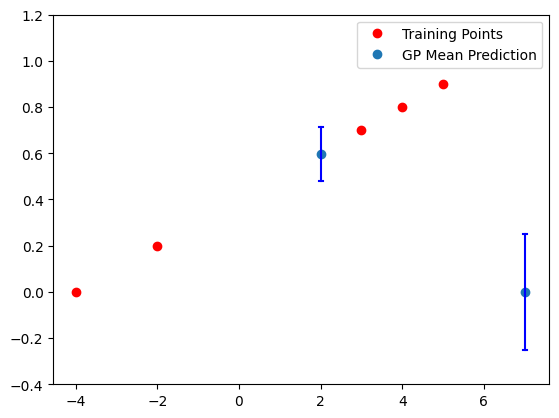

In [68]:
np.random.seed(42)

var = np.diag(cov_2)
plt.plot(X_1, y_1, 'ro', label="Training Points")
plt.plot(X_2, mu_2, 'o', label="GP Mean Prediction")
lw = 0.1
color = 'blue'
plt.ylim(-0.4,1.2)
for i in range(len(X_2)):
    top, bottom = mu_2[i] + (var_2[i]*0.01), mu_2[i] - (var_2[i]*0.01)
    left, right = X_2[i] -  lw/ 2, X_2[i] + lw/ 2
    plt.plot([X_2[i],X_2[i]], [top, bottom ], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
plt.legend(loc = 'upper right')

The vertical lines are proportional to the variance of the prediction. Overall, the plot illustrates two key points:

1. Predictions further away from known data are less affected. This is influenced by both the length parameter l and the choice of kernel. The l parameter controls the rate at which covariance decreases with distance. Additionally, the chosen kernel function favors variables that are close to each other. However, certain kernels can also relate distant variables, such as in the case of periodic data.

2. The prior assumption is μ=0. This means that for points with less data, predictions tend to be closer to zero, as there is less evidence to deviate from the prior.

In [44]:
cov_2

array([[ 1.16024005e+01, -6.33413340e-04],
       [-6.33413340e-04,  2.50099999e+01]])

In [45]:
def GP(X_1, y_1, X_2, l=1.0, sigma=1.0, epsilon=1e-8):
    K_X_1_X_1 = kernel(X_1, X_1, l, sigma) + epsilon * np.eye(len(X_1))
    K_X_1_X_2 = kernel(X_1, X_2, l, sigma)
    K_X_2_X_2 = kernel(X_2, X_2, l, sigma) + epsilon * np.eye(len(X_2))

    # Compute the mean of the posterior distribution
    K_inv = np.linalg.inv(K_X_1_X_1)
    mu_2 = K_X_1_X_2.T @ K_inv @ y_1
    cov_2 = K_X_2_X_2 - K_X_1_X_2.T @ K_inv @ K_X_1_X_2
    
    return mu_2, cov_2

In [60]:
X_1 = np.array([-4,  -2,   3, 4, 5]).reshape(-1, 1)
y_1 = (np.array([-4, -2,   3, 4, 5]) * 0.1) + np.ones(len(X_1)) * 0.4 #+ np.random.normal(0, 0.1, len(X_1))
X_2 = np.array([2,7]).reshape(-1,1)
mu, cov = GP(X_1, y_1, X_2,l = 3)

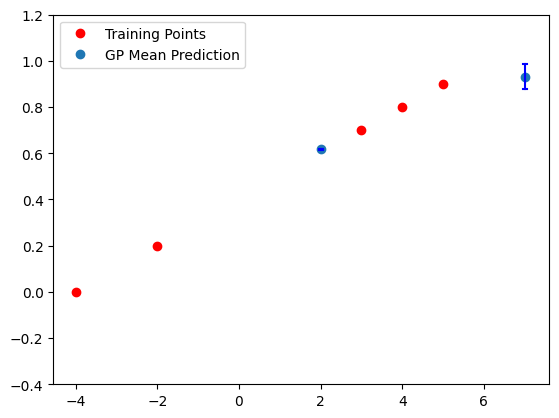

In [67]:
np.random.seed(42)

var = np.diag(cov)
plt.plot(X_1, y_1, 'ro', label="Training Points")
plt.plot(X_2, mu, 'o', label="GP Mean Prediction")
lw = 0.1
color = 'blue'
plt.ylim(-0.4,1.2)
for i in range(len(X_2)):
    top, bottom = mu[i] + (var[i]), mu[i] - (var[i])
    left, right = X_2[i] -  lw/ 2, X_2[i] + lw/ 2
    plt.plot([X_2[i],X_2[i]], [top, bottom ], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
plt.legend(loc = 'upper left')

Here is the same experiment, but with more data. Notice how the point further away is raised, and the overall variance has decreased.

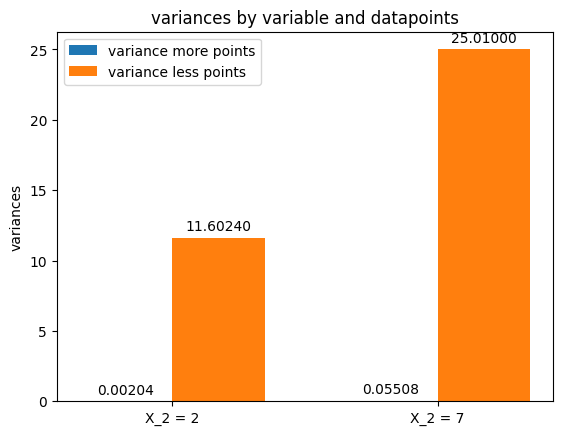

In [62]:

labels = ['X_2 = 2', 'X_2 = 7']
mvar = np.diag(cov)
lvar = np.diag(cov_2)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mvar, width, label='variance more points')
rects2 = ax.bar(x + width/2, lvar, width, label='variance less points')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.5f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

ax.set_ylabel('variances')
ax.set_title('variances by variable and datapoints')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()

Final Example 

To generate a more promising graph, more data points are necessary.

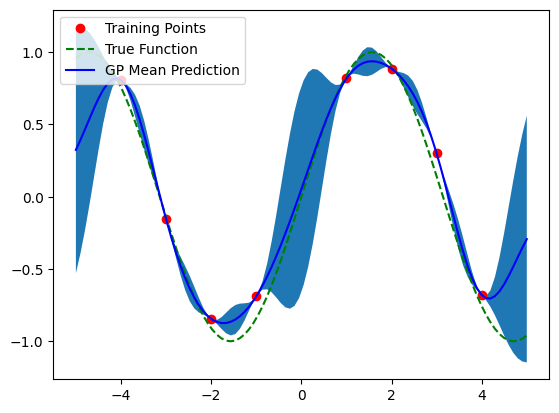

In [81]:
np.random.seed(42)
X_train = np.array([-4, -3, -2, -1, 1, 2, 3, 4]).reshape(-1, 1)
y_train = np.sin(X_train).ravel() + 0.1 * np.random.randn(len(X_train))  # Noisy observations
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
f = lambda x: np.array(x^3*0.1 + x^2*0.14 + x*0.01)

mu_final, cov_final = GP(X_train, y_train, X_test,0.7)
var = np.diag(cov_final)
plt.plot(X_train, y_train, 'ro', label="Training Points")
plt.plot(X_test, np.sin(X_test), 'g--', label="True Function")
plt.plot(X_test, mu_final, 'b-', label="GP Mean Prediction")
plt.fill_between(X_test.ravel(), mu_final - var,mu_final +var)
plt.legend(loc = 'upper left')

In [80]:
np.shape(mu_final)

(100, 8)

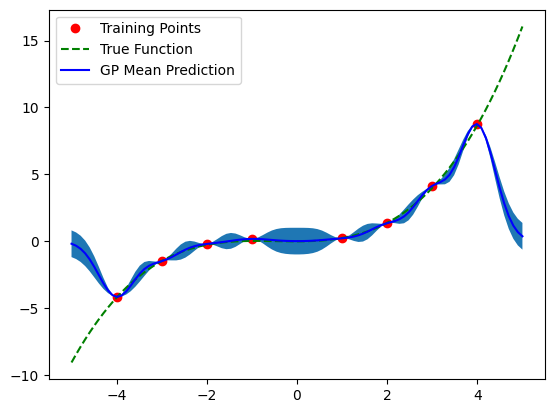

In [95]:
np.random.seed(42)
f = lambda x: np.pow(x,3)*0.1 + np.pow(x,2)*0.14 + x*0.01
X_train = np.array([-4, -3, -2, -1, 1, 2, 3, 4]).reshape(-1, 1)
y_train = f(X_train).ravel() + 0.1 * np.random.randn(len(X_train))  # Noisy observations
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

mu_final, cov_final = GP(X_train, y_train, X_test,0.4)
var = np.diag(cov_final)
plt.plot(X_train, y_train, 'ro', label="Training Points")
plt.plot(X_test, f(X_test), 'g--', label="True Function")
plt.plot(X_test, mu_final, 'b-', label="GP Mean Prediction")
plt.fill_between(X_test.ravel(), mu_final - var,mu_final + var)
plt.legend(loc = 'upper left')

Choosing the Prior

As seen, the prior μ always serves as the fallback for the regression. To choose a good prior, the key question is: what is a reasonable prediction when there is little to no knowledge about the point?

To incorporate a prior other than 0, simply subtract the prior from the training data and add it back after inference.